<img src="Images/logo.jpg" width="600">

## Exercitation_07 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import math
import time
from scipy import constants

### Part 01
I wrote a function to equilbrate the system, and added another parameter $n_{eq}$ in the input files, to choose the number of steps of equilibration. In my simulations, I used the first $3000$, $10000$ and $15000$ steps for the solid, liquid and gas phase respectively.  
Then I wrote another function to compute instant values of $U/N$ and $P$.  
With the equilibrated system I perform a simulation of $5 \times 10^5$ steps in the three thermodynamic conditions given:  
solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$, cut-off radius: $r_c = 2.2$ ;      
liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$, cut-off radius: $r_c = 2.5$;  
gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$, cut-off radius: $r_c = 5.0$ .  
    
I had to modify the Monte Carlo step and make it bigger in the gas phase, to get an acceptance ratio of about 70%. (I couldn't make it lower, because the lenght of the step is limited by the half-size of the lenght of the cubic box).
    
Using these data, I implement below a Python script to evalue the auto-correlation function $\chi(t)$ and from this make an idea of the size of the blocks.  
The plots have *log-scale* on the y axis.

In [2]:
def Auto_Correlation(t, oss):   #function of time and uses the properties of the vector of observables
    t_max= len(oss)
    x_den= np.sum(oss**2)/t_max - (np.sum(oss)/t_max)**2
    x1 = oss[0:t_max-t]
    x2 = oss[t:t_max]
    x_num = np.sum(x1*x2)/(t_max-t)-np.sum(x1)*np.sum(x2)/(t_max-t)**2
    
    return x_num / x_den

In [4]:
UNs= ascii.read('P1-2/Risultati/Solid/epot.inst',format='no_header')
UNs = UNs['col1']  
Ps= ascii.read('P1-2/Risultati/Solid/pres.inst',format='no_header')
Ps = Ps['col1']
UNl= ascii.read('P1-2/Risultati/Liquid/epot.inst',format='no_header')
UNl = UNl['col1']
Pl= ascii.read('P1-2/Risultati/Liquid/pres.inst',format='no_header')
Pl = Pl['col1']
UNg= ascii.read('P1-2/Risultati/Gas/epot.inst',format='no_header')
UNg = UNg['col1']
Pg= ascii.read('P1-2/Risultati/Gas/pres.inst',format='no_header')
Pg = Pg['col1']
rt=100
chiUNs = np.zeros(rt)
chiPs = np.zeros(rt)
chiUNl = np.zeros(rt)
chiPl = np.zeros(rt)
chiUNg = np.zeros(rt)
chiPg = np.zeros(rt)
for t in range(rt):
    chiUNs[t]=Auto_Correlation(t,UNs)
    chiPs[t]=Auto_Correlation(t,Ps)
    chiUNl[t]=Auto_Correlation(t,UNl)
    chiPl[t]=Auto_Correlation(t,Pl)
    chiUNg[t]=Auto_Correlation(t,UNg)
    chiPg[t]=Auto_Correlation(t,Pg)

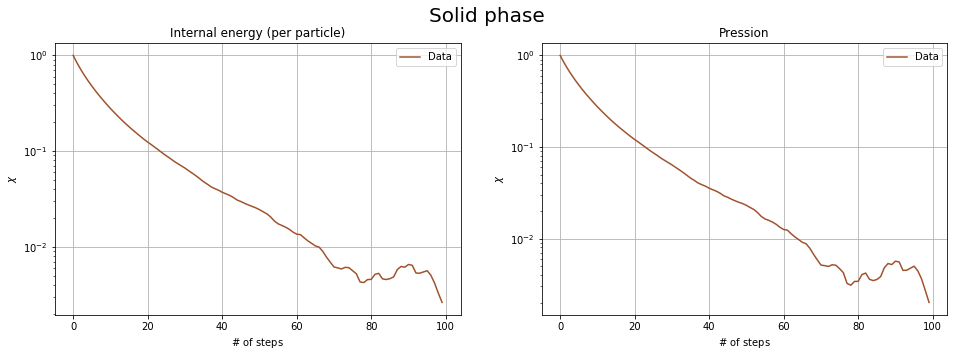

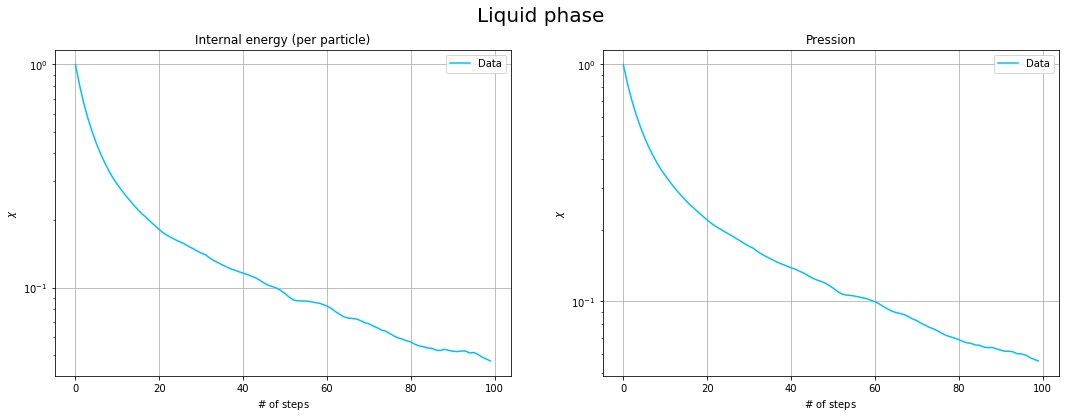

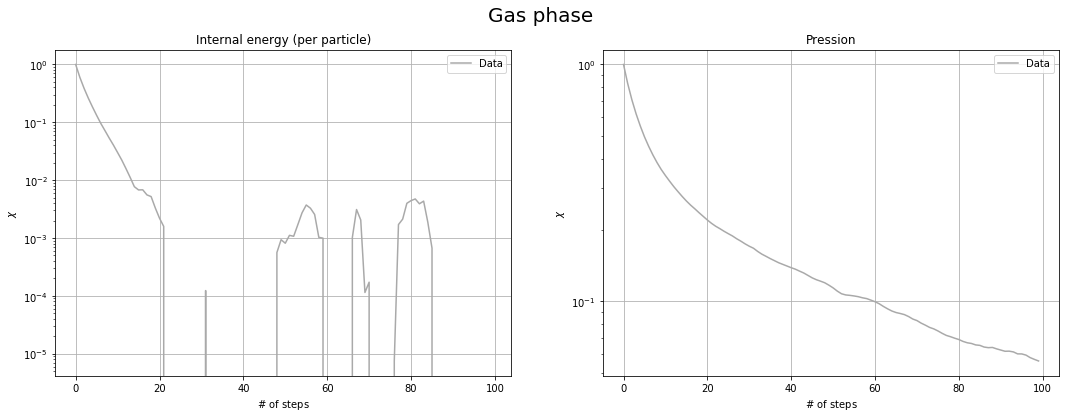

In [8]:
plt.figure(figsize=(16,5))
plt.suptitle('Solid phase',fontsize=20)

plt.subplot(121)
plt.plot(chiUNs, label='Data', color='sienna')
plt.title('Internal energy (per particle)')
plt.xlabel('$\#$ of steps')
plt.ylabel('$\chi$')
plt.yscale('Log')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.plot(chiPs, label='Data', color='sienna')
plt.title('Pression')
plt.xlabel('$\#$ of steps')
plt.ylabel('$\chi$')
plt.yscale('Log')
plt.grid(True)
plt.legend()

plt.figure(figsize=(18,6))
plt.suptitle('Liquid phase',fontsize=20)
plt.subplot(121)
plt.plot(chiUNl, label='Data', color='deepskyblue')
plt.title('Internal energy (per particle)')
plt.xlabel('$\#$ of steps')
plt.ylabel('$\chi$')
plt.yscale('Log')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.plot(chiPl, label='Data', color='deepskyblue')
plt.title('Pression')
plt.xlabel('$\#$ of steps')
plt.ylabel('$\chi$')
plt.yscale('Log')
plt.grid(True)
plt.legend()

plt.figure(figsize=(18,6))
plt.suptitle('Gas phase',fontsize=20)
plt.subplot(121)
plt.plot(chiUNg, label='Data', color='darkgray')
plt.title('Internal energy (per particle)')
plt.xlabel('$\#$ of steps')
plt.ylabel('$\chi$')
plt.yscale('Log')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.plot(chiPl, label='Data', color='darkgray')
plt.title('Pression')
plt.xlabel('$\#$ of steps')
plt.ylabel('$\chi$')
plt.yscale('Log')
plt.grid(True)
plt.legend()

plt.show()

With the same data, I estimate the statistical uncertainties varying the size of the blocks from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks.  
I write this Python script to do it, which is strongly related with the one of the blocking method of the `Exercitation_01`, which returns the uncertainty we want to study.

In [4]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

def Block_met_var(L,oss):
    M = len(oss)
    N = int(M/L)
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog = np.zeros(N)
    su2_prog = np.zeros(N)
    err_prog = np.zeros(N)
    
    for i in range(N):
        sum = 0
        for j in range(L):
            k = j+i*L
            sum += oss[k] # Accumulate measures
        ave[i] = sum/L           # Estimate in each block 
        av2[i] = (ave[i])**2 

    for i in range(N):
        for j in range(i+1):
            sum_prog[i] += ave[j] 
            su2_prog[i] += av2[j] 
        sum_prog[i]/=(i+1) # Cumulative average
        su2_prog[i]/=(i+1) # Cumulative square average
        err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
        
    return err_prog[N-1]

Here I plot the uncertinties in function of the lenght $L$ of the block: we can see it reach a *saturation* and we can suppose it happens when the block is large enough.  
It required me some time (about 3 hours) to evalue the `Block_met_var` for six observables (internal energy and pressure in solid, liquid and gas phases) and 499 times from $L=10$ to $L=5 \times 10^3$ in step of $10$. Thus, I divided it for the three phases and save an output file `e_sol`,`e_liq`,`e_gas` with the errors, to be able to plot the data reading them from these files (extremely quicker). 

In [5]:
L_min = 10 
L_max= 5000
L_step= 10 #step of evaluation of L
nL= int((L_max-L_min)/L_step) #number of evaluation of L
e_UNs=np.zeros(nL)
e_Ps=np.zeros(nL)
e_UNl=np.zeros(nL)
e_Pl=np.zeros(nL)
e_UNg=np.zeros(nL)
e_Pg=np.zeros(nL)
L_x = np.zeros(nL) #x-axis

#COMPLETE CYCLE: VERY LONG TO EXECUTE
#I DIVIDE THE CYCLE BELOW AND SAVE THE RESULTS IN AN OUTPUT FILE, SO I WILL READ FROM IT NEXT TIME AND FOR PLOTS
#i=0
#for l in range(L_min, L_max, L_step): #loading the vector with errors
#    e_UNs[i]=Block_met_var(l,UNs)
#    e_Ps[i]=Block_met_var(l,Ps)
#    e_UNl[i]=Block_met_var(l,UNl)
#    e_Pl[i]=Block_met_var(l,Pl)
#    e_UNg[i]=Block_met_var(l,UNg)
#    e_Pg[i]=Block_met_var(l,Pg)
#    L_x[i] = L_step* i
#    i+=1 

In [ ]:
#SOLID PHASE
#Warning: 63 minutes to execute
f= open("P1-2/Risultati/Solid/err_sol.txt","w+")
i=0
for l in range(L_min, L_max, L_step): #loading the vector with errors
    e_UNs[i]=Block_met_var(l,UNs)
    e_Ps[i]=Block_met_var(l,Ps)
    L_x[i] = L_step* i  # L for the x-axis
    f.write(str(L_x[i]))
    f.write('  ')
    f.write(str(e_UNs[i]))
    f.write('  ')
    f.write(str(e_Ps[i]))
    f.write('\n')
    i+=1
f.close()

In [ ]:
#LIQUID PHASE
#Warning: 63 minutes to execute
f= open("P1-2/Risultati/Liquid/err_liq.txt","w+")
i=0
for l in range(L_min, L_max, L_step): #loading the vector with errors
    e_UNl[i]=Block_met_var(l,UNl)
    e_Pl[i]=Block_met_var(l,Pl)
    L_x[i] = L_step* i  # L for the x-axis
    f.write(str(L_x[i]))
    f.write('  ')
    f.write(str(e_UNl[i]))
    f.write('  ')
    f.write(str(e_Pl[i]))
    f.write('\n')
    i+=1
f.close()

In [ ]:
#GAS PHASE
#Warning: 65 minutes to execute
f= open("P1-2/Risultati/Gas/err_gas.txt","w+")
i=0
for l in range(L_min, L_max, L_step): #loading the vector with errors
    e_UNg[i]=Block_met_var(l,UNg)
    e_Pg[i]=Block_met_var(l,Pg)
    L_x[i] = L_step* i  # L for the x-axis
    f.write(str(L_x[i]))
    f.write('  ')
    f.write(str(e_UNg[i]))
    f.write('  ')
    f.write(str(e_Pg[i]))
    f.write('\n')
    i+=1
f.close()

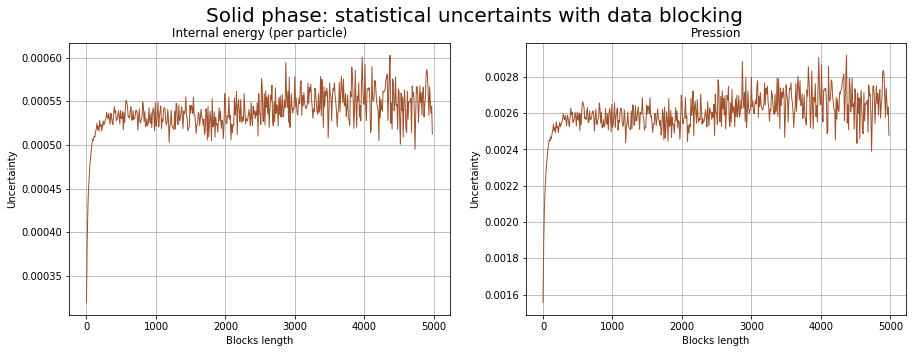

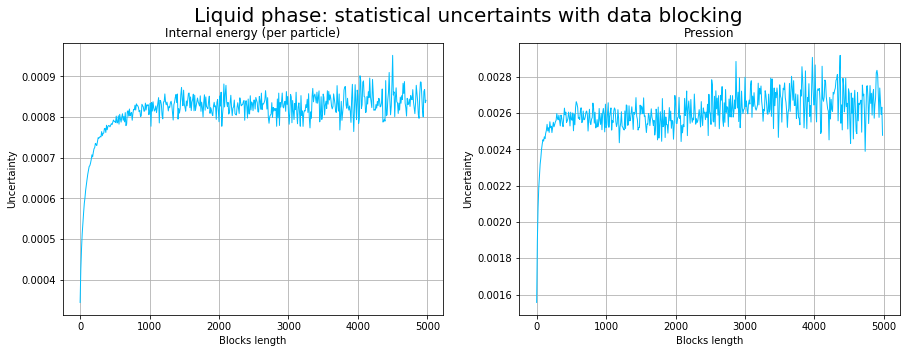

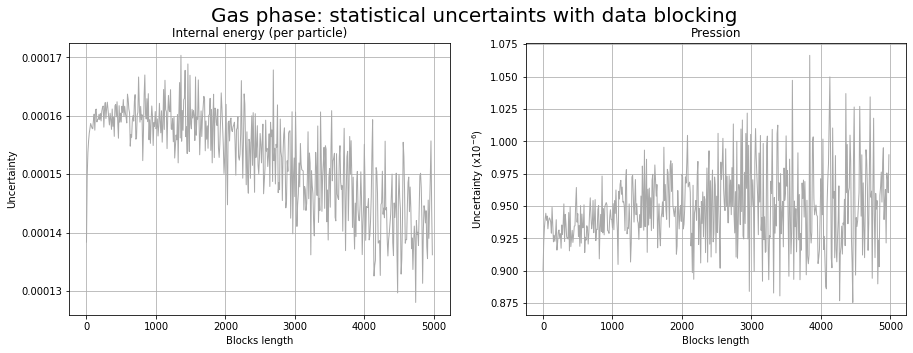

In [13]:
e_s= ascii.read('P1-2/Risultati/Solid/err_sol.txt',format='no_header')
L_x=e_s['col1']
e_UNs = e_s['col2']
e_Ps = e_s['col3']
e_l= ascii.read('P1-2/Risultati/Liquid/err_liq.txt',format='no_header')
e_UNl = e_l['col2']
e_Pl = e_s['col3']
e_g= ascii.read('P1-2/Risultati/Gas/err_gas.txt',format='no_header')
e_UNg = e_g['col2']
e_Pg = e_g['col3']
plt.figure(figsize=(15,5))
plt.suptitle('Solid phase: statistical uncertaints with data blocking',fontsize=20)

plt.subplot(121)
plt.plot(L_x, e_UNs, color='sienna', lw=1)
plt.title('Internal energy (per particle)')
plt.xlabel('Blocks length')
plt.ylabel('Uncertainty')
plt.grid(True)

plt.subplot(122)
plt.plot(L_x, e_Ps, color='sienna', lw=1)
plt.title('Pression')
plt.xlabel('Blocks length')
plt.ylabel('Uncertainty')
plt.grid(True)

plt.figure(figsize=(15,5))
plt.suptitle('Liquid phase: statistical uncertaints with data blocking',fontsize=20)

plt.subplot(121)
plt.plot(L_x, e_UNl, color='deepskyblue', lw=1)
plt.title('Internal energy (per particle)')
plt.xlabel('Blocks length')
plt.ylabel('Uncertainty')
plt.grid(True)

plt.subplot(122)
plt.plot(L_x, e_Pl, color='deepskyblue', lw=1)
plt.title('Pression')
plt.xlabel('Blocks length')
plt.ylabel('Uncertainty')
plt.grid(True)

plt.figure(figsize=(15,5))
plt.suptitle('Gas phase: statistical uncertaints with data blocking',fontsize=20)

plt.subplot(121)
plt.plot(L_x, e_UNg, color='darkgray', lw=1)
plt.title('Internal energy (per particle)')
plt.xlabel('Blocks length')
plt.ylabel('Uncertainty')
plt.grid(True)

plt.subplot(122)
plt.plot(L_x, e_Pg*1E6, color='darkgray', lw=1)
plt.title('Pression')
plt.xlabel('Blocks length')
plt.ylabel('Uncertainty (x$ 10^{-6}$)')
plt.grid(True)

plt.show()

### Part 02
    
I included the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; \dfrac{L}{2}\right]$.  
This added two output files:  
1) `output.gofr.0` with the columns $r$ and $g(r)$, with the average value in each block. The blocks are separated by an empty line in this file.  
2) `output.gave.0` with the columns $r$, $g(r)$ and the statistical uncertainties of $g(r)$, with the final average value.

###  Part 03

I included the calculation of $g(r)$ in the MD code, which I reported in the directory `P3-4`.

### Part 04

By means of this MC code, I equilibrated the system and perform MC NVT simulations via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

For each phase, I report four plots: the potenitial energy per particle $<U>/N$, the pressure $P$, $g(r)$ as a function of $r$ in meters, which tell us how the particles are distribuited, and the comparison between $g(r)$s obtained with the MC NVT simulation and the MD NVE simulation of `Exercitation04`. 

In [2]:
#costants
sig = 0.34E-9
kb = constants.value('Boltzmann constant') #[J/K]
amu = constants.value('atomic mass constant') #[kg]
eps = 120 * kb    # [J]
m = 39.948 * amu  # [kg]
e = constants.value('elementary charge')
pr = e/(sig**3)

In [7]:
grsMD= ascii.read('P3-4/Risultati/Solid/gofr.ave',format='no_header')
rs1 = grsMD['col1']
gs1 = grsMD['col2']
errgs1 = grsMD['col3']
grlMD= ascii.read('P3-4/Risultati/Liquid/gofr.ave',format='no_header')
rl1 = grlMD['col1']
gl1 = grlMD['col2']
errgl1 = grlMD['col3']
grgMD= ascii.read('P3-4/Risultati/Gas/gofr.ave',format='no_header')
rg1 = grgMD['col1']
gg1 = grgMD['col2']
errgg1 = grgMD['col3']
grsMC= ascii.read('P1-2/Risultati/Solid/output.gave.0',format='no_header')
rs = grsMC['col1']
gs = grsMC['col2']
errgs = grsMC['col3']
grlMC= ascii.read('P1-2/Risultati/Liquid/output.gave.0',format='no_header')
rl = grlMC['col1']
gl = grlMC['col2']
errgl = grlMC['col3']
grgMC= ascii.read('P1-2/Risultati/Gas/output.gave.0',format='no_header')
rg = grgMC['col1']
gg = grgMC['col2']
errgg = grgMC['col3']

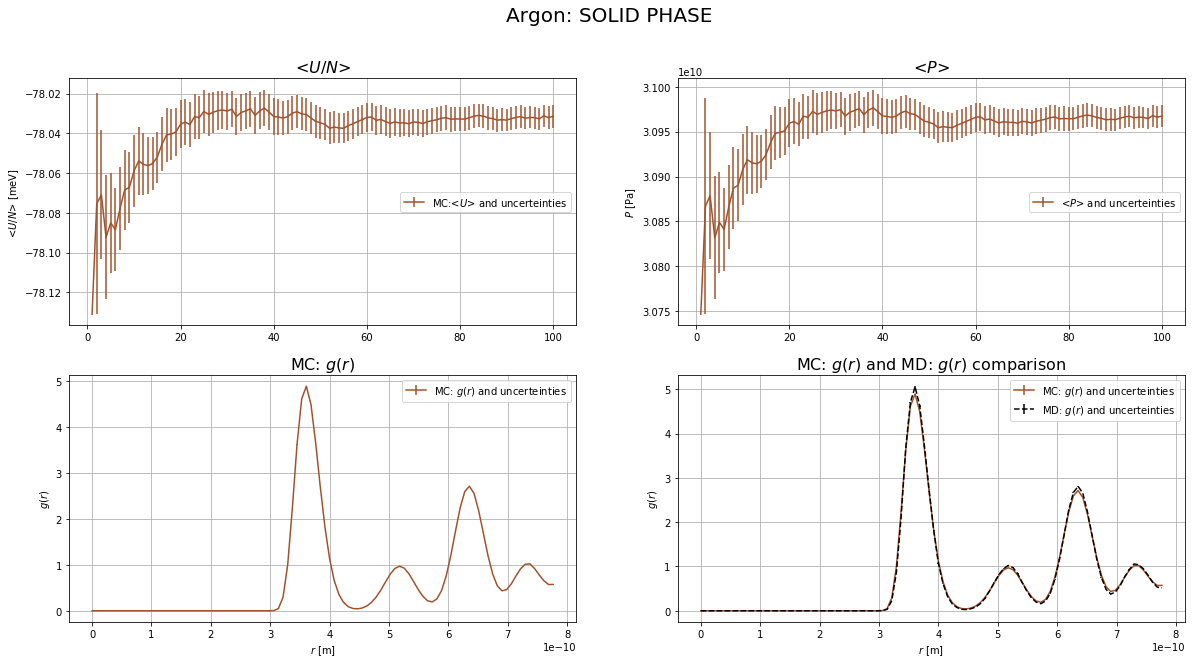

In [11]:
plt.figure(figsize=(20,10))
plt.suptitle('Argon: SOLID PHASE', fontsize = 20)

plt.subplot(221)
plt.title('<$U/N$>', fontsize = 16)
data= ascii.read('P1-2/Risultati/Solid/output.epot.0', format='no_header')
x = data['col1'] 
U = data['col3'] #vector with mean
err_U = data['col4'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, eps * U/e*1E3, eps * err_U/e*1E3,  color = 'sienna' , label= 'MC:<$U$> and uncerteinties' )
#plt.xlabel('$\#$ of steps')
plt.ylabel('<$U/N$> [meV]')
plt.legend(loc=7)

plt.subplot(222)
plt.title('<$P$>', fontsize = 16)
data= ascii.read('P1-2/Risultati/Solid/output.pres.0', format='no_header')
x = data['col1'] 
P = data['col3'] #vector with mean
err_P = data['col4'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, P*pr, err_P * pr,  color = 'sienna' , label= '<$P$> and uncerteinties' )
#plt.xlabel('$\#$ of steps')
plt.ylabel('$P$ [Pa]')
plt.legend(loc=7)

plt.subplot(223)
plt.title('MC: $g(r)$', fontsize = 16)
plt.grid(True)
plt.errorbar(rs*sig, gs, errgs,  color = 'sienna' , label= 'MC: $g(r)$ and uncerteinties' )
plt.xlabel('$r$ [m]')
plt.ylabel('$g(r)$')
plt.legend()

plt.subplot(224)
plt.title('MC: $g(r)$ and MD: $g(r)$ comparison', fontsize = 16)
plt.grid(True)
plt.errorbar(rs*sig, gs, errgs,  color = 'sienna' , label= 'MC: $g(r)$ and uncerteinties' )
plt.errorbar(rs1*sig, gs1, errgs1,  color = 'black' , label= 'MD: $g(r)$ and uncerteinties', linestyle='dashed')
plt.xlabel('$r$ [m]')
plt.ylabel('$g(r)$')
plt.legend()

plt.show()

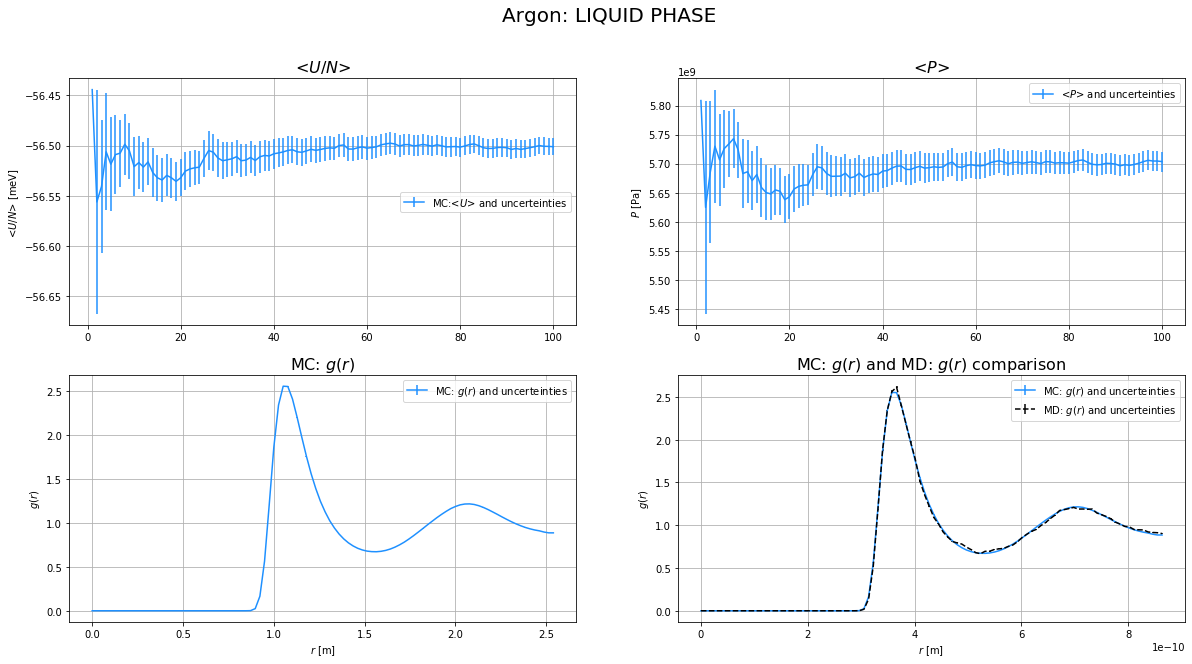

In [10]:
plt.figure(figsize=(20,10))
plt.suptitle('Argon: LIQUID PHASE', fontsize = 20)

plt.subplot(221)
plt.title('<$U/N$>', fontsize = 16)
data= ascii.read('P1-2/Risultati/Liquid/output.epot.0', format='no_header')
x = data['col1'] 
U = data['col3'] #vector with mean
err_U = data['col4'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, eps * U/e*1E3, eps * err_U/e*1E3,  color = 'dodgerblue' , label= 'MC:<$U$> and uncerteinties' )
#plt.xlabel('$\#$ of steps')
plt.ylabel('<$U/N$> [meV]')
plt.legend(loc=7)

plt.subplot(222)
plt.title('<$P$>', fontsize = 16)
data= ascii.read('P1-2/Risultati/Liquid/output.pres.0', format='no_header')
x = data['col1'] 
P = data['col3'] #vector with mean
err_P = data['col4'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, P*pr, err_P * pr,  color = 'dodgerblue' , label= '<$P$> and uncerteinties' )
#plt.xlabel('$\#$ of steps')
plt.ylabel('$P$ [Pa]')
plt.legend()

plt.subplot(223)
plt.title('MC: $g(r)$', fontsize = 16)
plt.grid(True)
plt.errorbar(rl, gl, errgl,  color = 'dodgerblue' , label= 'MC: $g(r)$ and uncerteinties' )
plt.xlabel('$r$ [m]')
plt.ylabel('$g(r)$')
plt.legend()

plt.subplot(224)
plt.title('MC: $g(r)$ and MD: $g(r)$ comparison', fontsize = 16)
plt.grid(True)
plt.errorbar(rl*sig, gl, errgl,  color = 'dodgerblue' , label= 'MC: $g(r)$ and uncerteinties' )
plt.errorbar(rl1*sig, gl1, errgl1,  color = 'black' , label= 'MD: $g(r)$ and uncerteinties', linestyle='dashed')
plt.xlabel('$r$ [m]')
plt.ylabel('$g(r)$')
plt.legend()

plt.show()

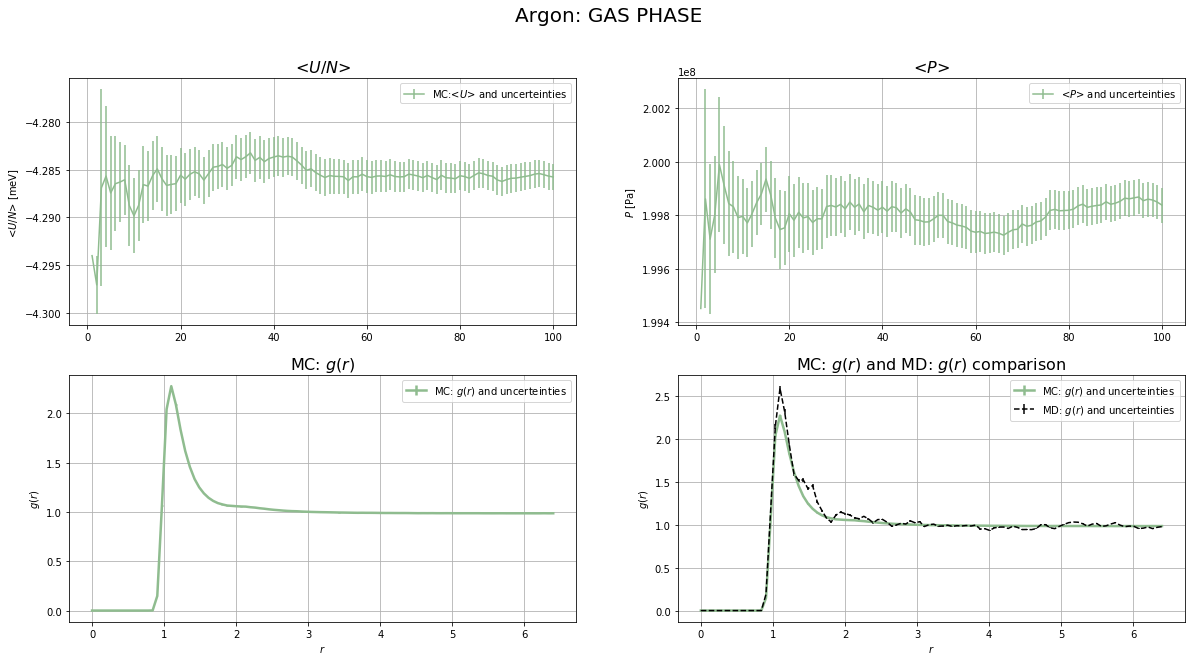

In [49]:
plt.figure(figsize=(20,10))
plt.suptitle('Argon: GAS PHASE', fontsize = 20)

plt.subplot(221)
plt.title('<$U/N$>', fontsize = 16)
data= ascii.read('P1-2/Risultati/Gas/output.epot.0', format='no_header')
x = data['col1'] 
U = data['col3'] #vector with mean
err_U = data['col4'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, eps * U/e*1E3, eps * err_U/e*1E3,  color = 'darkseagreen' , label= 'MC:<$U$> and uncerteinties' )
#plt.xlabel('$\#$ of steps')
plt.ylabel('<$U/N$> [meV]')
plt.legend()

plt.subplot(222)
plt.title('<$P$>', fontsize = 16)
data= ascii.read('P1-2/Risultati/Gas/output.pres.0', format='no_header')
x = data['col1'] 
P = data['col3'] #vector with mean
err_P = data['col4'] #vector with uncertainties
plt.grid(True)
plt.errorbar(x, P*pr, err_P * pr,  color = 'darkseagreen' , label= '<$P$> and uncerteinties' )
#plt.xlabel('$\#$ of steps')
plt.ylabel('$P$ [Pa]')
plt.legend()

plt.subplot(223)
plt.title('MC: $g(r)$', fontsize = 16)
plt.grid(True)
plt.errorbar(rg, gg, errgg,  color = 'darkseagreen' , lw=2.5, label= 'MC: $g(r)$ and uncerteinties' )
plt.xlabel('$r$')
plt.ylabel('$g(r)$')
plt.legend()

plt.subplot(224)
plt.title('MC: $g(r)$ and MD: $g(r)$ comparison', fontsize = 16)
plt.grid(True)
plt.errorbar(rg, gg, errgg,  color = 'darkseagreen' , lw=2.5, label= 'MC: $g(r)$ and uncerteinties' )
plt.errorbar(rg1, gg1, errgg1,  color = 'black' , label= 'MD: $g(r)$ and uncerteinties', linestyle='dashed')
plt.xlabel('$r$')
plt.ylabel('$g(r)$')
plt.legend()

plt.show()

The values of potential energy are quite different from the ones obtained with the Molecular Dynamics code. Partly, it can be a consequence of some corrections we hadn't used before, i.e. the tail correction.  
The errors, estimated with the blocking method, are lower with the MonteCarlo simulation. 

Finally, it is very impressive how much the functions $g(r)$, obtained with two methods completely different and indipendent, almost perfectly overlap each other.   